In [1]:
%matplotlib notebook

import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from scipy import misc
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq
from scipy.integrate import dblquad
from numpy.fft import rfft2, irfft2, rfftfreq
from scipy.spatial import distance


In [2]:

def u(p):
    return 10

def rayleigh_sommerfield(p2,p0,wavelength,n):#I assume an orthogonal aperture
    k=2*np.pi*wavelength
    
    area=dblquad(lambda x,y:np.exp(1j*k*(distance.euclidean(p2,(x,y))+distance.euclidean(p0,(x,y))))*np.inner(n,(p0[0]-x,p0[1]-y))*(1.0/(np.maximum(0.01,distance.euclidean(p2,(x,y))*distance.euclidean(p0,(x,y))))), -1, 1, lambda y: -1, lambda y: 1)
    print(area)
    return np.abs(area[0]/(1j*wavelength))

space_to_plot=150
space_density=0.02
space_array = np.linspace(-space_to_plot*0.5,space_to_plot*0.5,space_to_plot*space_density)

def rayleigh_sommerfield_matrix(space_array):
    light_point = (10,10)
    result = np.zeros((len(space_array),len(space_array)))
    for x in range(0,len(space_array)):
        for y in range(0,len(space_array)):
            result[x][y]=rayleigh_sommerfield(light_point,(space_array[x],space_array[y]),10,(1,0))
    return result

rs_matrix = rayleigh_sommerfield_matrix(space_array)
print(rs_matrix)


C:\Users\camer\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:380: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


(-0.06021973662766876, 3.5395121801417573e-12)
(0.00017448034762618884, 1.462434268326659e-08)
(0.0003136308140074791, 2.4747449461372435e-12)
(3.634232780970661e-07, 1.2912778797565945e-08)
(0.016457998343101344, 1.4876283180223651e-08)
(-2.7478672374340896e-08, 1.4797365337364857e-08)
(-0.00029860966209213006, 2.672013428154294e-12)
(2.925801421279138e-05, 7.581298952969845e-10)
(1.1087411129977082e-05, 1.4521546340574331e-08)
[[  6.02197366e-03   1.74480348e-05   3.13630814e-05]
 [  3.63423278e-08   1.64579983e-03   2.74786724e-09]
 [  2.98609662e-05   2.92580142e-06   1.10874111e-06]]


<IPython.core.display.Javascript object>


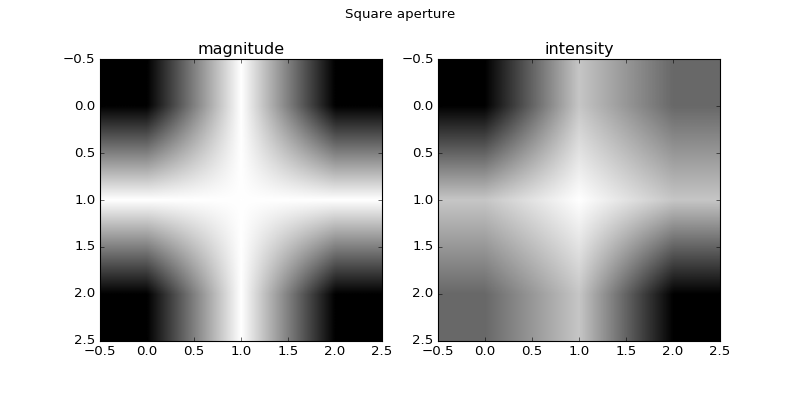

<IPython.core.display.Javascript object>


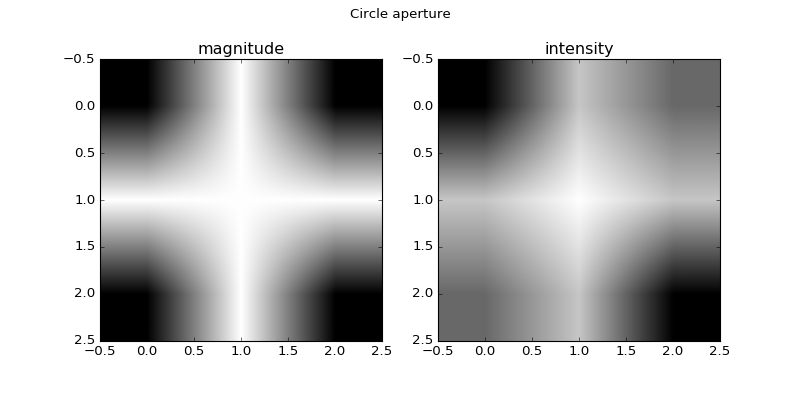

<IPython.core.display.Javascript object>


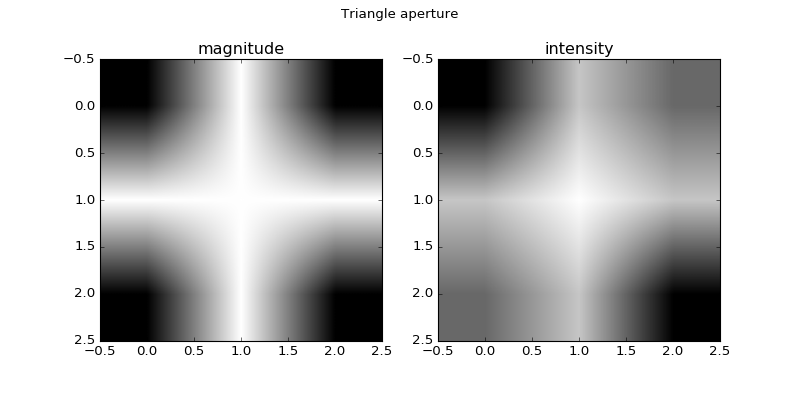

<IPython.core.display.Javascript object>


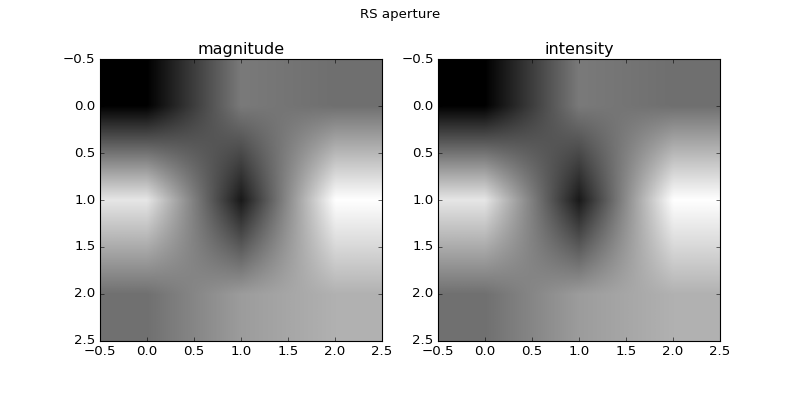

In [3]:

def square(x,y):
    if np.abs(x*0.5)<1 and np.abs(y)<1: #scale the x by half because I can!
        return 1
    else:
        return 0
    
def circle(x,y):
    if (x*0.5)**2+(y)**2<=1: #scale x here again!
        return 1
    else:
        return 0
def triangle(x,y): #I may have some typo mistake on the calculations of barycentrics but still gives an interesting shape
    p1=[0,1]
    p2=[1,-1.4]
    p3=[-1,-1.4]
    alpha = ((p2[1] - p3[1])*(x - p3[0]) + (p3[0] - p2[0])*(y - p3[1]))/((p2[1] - p3[1])*(p1[0] - p3[0]) + (p3[0] - p2[0])*(p1[1] - p3[1]))
        
    beta = ((p3[1] - p1[1])*(x - p3[0]) + (p1[0] - p3[0])*(y - p3[1])) /((p2[1] - p3[1])*(p1[0] - p3[0]) + (p3[0] - p2[0])*(p1[1] - p3[1]))
        
    gamma = 1 - alpha - beta;
    if alpha>0 and beta>0 and gamma>0:
        return 1
    else:
        return 0

def mapp(space_array,func):
    result = np.zeros((len(space_array),len(space_array)))
    for x in range(0,len(space_array)):
        for y in range(0,len(space_array)):
            result[x][y]=func(space_array[x],space_array[y])
    return result

space_to_plot=150
space_density=0.02
space_array = np.linspace(-space_to_plot*0.5,space_to_plot*0.5,space_to_plot*space_density)

#scale  with 1/λz
wavelength = 100.0E-9
zeta = 2.0E6
lambda_zeta = wavelength*zeta 
space_array=space_array*lambda_zeta
square_ap = mapp(space_array,square)
square_ap_area = np.sum(square_ap)
circle_ap = mapp(space_array,circle)
circle_ap_area = np.sum(circle_ap)
triangle_ap = mapp(space_array,triangle)
triangle_ap_area = np.sum(triangle_ap)


#magnitude
square_ap_magn = (square_ap_area/lambda_zeta)*fftshift(fft2(square_ap),axes=(0,1))
circle_ap_magn = (circle_ap_area/lambda_zeta)*fftshift(fft2(circle_ap),axes=(0,1))
triangle_ap_magn = (triangle_ap_area/lambda_zeta)*fftshift(fft2(triangle_ap),axes=(0,1))

#intensity
square_ap_int = square_ap_magn**2
circle_ap_int = circle_ap_magn**2
triangle_ap_int = triangle_ap_magn**2


def plott(magn,inten,name):
    fig =plt.figure(figsize=(10,5))
    
    fig.suptitle(name+" aperture")
    subpl_magn = fig.add_subplot(1,2,1)
    subpl_magn.set_title("magnitude")
    subpl_magn.imshow(np.abs(magn),cmap=cm.Greys_r)
    
    subpl_inten = fig.add_subplot(1,2,2)
    subpl_inten.set_title("intensity")
    subpl_inten.imshow(np.abs(inten),cmap=cm.Greys_r)
    
    fig.show()

plott((square_ap_magn),(square_ap_int),"Square")
plott((circle_ap_magn),(circle_ap_int),"Circle")
plott((triangle_ap_magn),(triangle_ap_int),"Triangle")
plott(np.log(rs_matrix),np.log(rs_matrix**2),"RS")    




    
    